In [2]:
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Функции

In [3]:
def transform_reviews(x):
    x = x.replace("nan", "None")
    x = ast.literal_eval(x)
    return x

# Загрузка Pandas и очистка данных

In [4]:
df = pd.read_csv("main_task.csv")
df_test = pd.read_csv("kaggle_task.csv")
sample_submission = pd.read_csv("sample_submission.csv")

Объединяем тестовый и тренировочный сэт

In [5]:
df['sample'] = 1
df_test['sample'] = 0
df_test['Rating'] = 0
df = df_test.append(df, sort=False).reset_index(drop=True)

In [6]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки
# Зафиксируем сид и дату для воспроизводимости экспериментов
RANDOM_SEED = 42
date_today = pd.to_datetime('2020-09-30')

**Дано в описании:**
- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.|

In [7]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


Переименуем часть столбцов для удобства использования.

In [8]:
df.rename(columns={"Restaurant_id": "restaurant_id",
                   "City": "city",
                   "Cuisine Style": "cuisine_style",
                   "Ranking": "ranking",
                   "Rating": "rating",
                   "Price Range": "price_range",
                   "Number of Reviews": "number_reviews",
                   "Reviews": "reviews",
                   "URL_TA": "url_ta",
                   "ID_TA": "id_ta",
                   },
          inplace=True)

restaurant_id - не несет никакой практической информации.

In [9]:
df.drop(["restaurant_id"], axis=1, inplace=True)

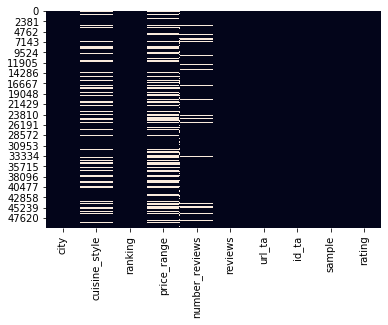

In [10]:
sns_heatmap = sns.heatmap(df.isnull(), cbar=False)

Cоздадим столбцы с информацией о том, где были пропуски.

In [11]:
df["nan_cuisine_style"] = pd.isna(df.cuisine_style).astype(int)
df["nan_price_range"] = pd.isna(df.price_range).astype(int)
df["nan_number_reviews"] = pd.isna(df.number_reviews).astype(int)

number_reviews - количество отзывов, заполним пропуски нулями.

In [12]:
df.number_reviews.fillna(0, inplace=True)

Заполняем пропуски в cuisine_style строкой с пустым списком и преобразуем cuisine_style из текста в список.

In [13]:
df.cuisine_style.fillna('[]', inplace=True)
df.cuisine_style = df.cuisine_style.apply(lambda x: ast.literal_eval(x))

Создаем признак с количеством кухонь в ресторане. Если список пустой, то ставим 1, ибо с 0 результат хуже.

In [14]:
df["сuisine_counts"] = df.cuisine_style.apply(
    lambda x: 1 if len(x) == 0 else len(x))

Заполним пропуски в price_range самым популярным значением и преобразуем в числовой формат.

In [15]:
df.price_range.value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price_range, dtype: int64

In [16]:
df.price_range = df.price_range.apply(
    lambda x: '$$ - $$$' if pd.isnull(x) else x)

In [17]:
# Преобразуем диапазон цен в числовой формат (1 - $, 2 - $$-$$$, 3 - $$$$)
df.price_range = df.price_range.apply(
    lambda x: 1 if x == '$' else 2 if x == '$$ - $$$' else 3)

Заполним пропуски в Reviews пустым значением

In [18]:
df.reviews = df.reviews.apply(
    lambda x: '[[], []]' if pd.isnull(x) else x)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                50000 non-null  object 
 1   cuisine_style       50000 non-null  object 
 2   ranking             50000 non-null  float64
 3   price_range         50000 non-null  int64  
 4   number_reviews      50000 non-null  float64
 5   reviews             50000 non-null  object 
 6   url_ta              50000 non-null  object 
 7   id_ta               50000 non-null  object 
 8   sample              50000 non-null  int64  
 9   rating              50000 non-null  float64
 10  nan_cuisine_style   50000 non-null  int64  
 11  nan_price_range     50000 non-null  int64  
 12  nan_number_reviews  50000 non-null  int64  
 13  сuisine_counts      50000 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 5.3+ MB


Если сейчас оставить только числовые значения, обучить модель и посчитать MAE, то получится 0.41 ... Это чуть лучше, чем просто подбросить монетку. Продолжим улучшать датафрейм. Дальше по ходу дополнения датафрейма будем по такому же принципу считать MAE.

### MAE = 0.41

### Мы заполнили все пропуски и теперь сосредоточимся на редактировании и добавлении параметров

### Города

In [20]:
print('Количество ресторанов в городе:')
restaurant_counts = df.city.value_counts()
print(restaurant_counts)

Количество ресторанов в городе:
London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: city, dtype: int64


**Создадим признак restaurant_counts** - количество ресторанов в городе.

In [21]:
df["restaurant_counts"] = df.city.apply(lambda x: restaurant_counts[x])

Добавим в датасет популяцию городов на 2020 год city_population - внешний источник данных: Yandex.

In [22]:
city_population = {
    'London': 7556900,
    'Paris': 2206488,
    'Madrid': 3155360,
    'Barcelona': 1621537,
    'Berlin': 3326002,
    'Milan': 1331586,
    'Rome': 2864466,
    'Prague': 1294513,
    'Lisbon': 547733,
    'Vienna': 1765649,
    'Amsterdam': 869709,
    'Brussels': 176545,
    'Hamburg': 1739117,
    'Munich': 1456039,
    'Lyon': 496343,
    'Stockholm': 1253309,
    'Budapest': 1741041,
    'Warsaw': 1720398,
    'Dublin': 506211,
    'Copenhagen': 1153615,
    'Athens': 664046,
    'Edinburgh': 482005,
    'Zurich': 402275,
    'Oporto': 221800,
    'Geneva': 196150,
    'Krakow': 762776,
    'Oslo': 673469,
    'Helsinki': 574579,
    'Bratislava': 419700,
    'Luxembourg': 576249,
    'Ljubljana': 277554
}
df["city_population"] = df.city.apply(lambda x: city_population[x])

**Добавим столбец restaurant_density** - плотность ресторанов на одного человека

In [23]:
df["rest_density"] = df.restaurant_counts / df.city_population

**Добавим столбец capital** - является ли город столицей. Внешний источник данных: Yandex.

In [24]:
capital = {
    'London': 1,
    'Paris': 1,
    'Madrid': 1,
    'Barcelona': 0,
    'Berlin': 1,
    'Milan': 0,
    'Rome': 1,
    'Prague': 1,
    'Lisbon': 1,
    'Vienna': 1,
    'Amsterdam': 1,
    'Brussels': 1,
    'Hamburg': 0,
    'Munich': 0,
    'Lyon': 0,
    'Stockholm': 1,
    'Budapest': 1,
    'Warsaw': 1,
    'Dublin': 1,
    'Copenhagen': 1,
    'Athens': 1,
    'Edinburgh': 0,
    'Zurich': 1,
    'Oporto': 0,
    'Geneva': 1,
    'Krakow': 0,
    'Oslo': 1,
    'Helsinki': 1,
    'Bratislava': 1,
    'Luxembourg': 1,
    'Ljubljana': 1
}

df["capital"] = df.city.apply(lambda x: capital[x])

**Добавим столбец country** - название страны. внешний источник данных: https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes


In [25]:
country = {
    'London': 'UK',
    'Paris': 'FR',
    'Madrid': 'ES',
    'Barcelona': 'ES',
    'Berlin': 'DE',
    'Milan': 'IT',
    'Rome': 'IT',
    'Prague': 'CZ',
    'Lisbon': 'PT',
    'Vienna': 'AT',
    'Amsterdam': 'NL',
    'Brussels': 'BE',
    'Hamburg': 'DE',
    'Munich': 'DE',
    'Lyon': 'FR',
    'Stockholm': 'SE',
    'Budapest': 'HU',
    'Warsaw': 'PL',
    'Dublin': 'IE',
    'Copenhagen': 'DK',
    'Athens': 'GR',
    'Edinburgh': 'UK',
    'Zurich': 'CH',
    'Oporto': 'PT',
    'Geneva': 'CH',
    'Krakow': 'PL',
    'Oslo': 'NO',
    'Helsinki': 'FI',
    'Bratislava': 'SK',
    'Luxembourg': 'LU',
    'Ljubljana': 'SI'
}

df["country"] = df.city.apply(lambda x: country[x])

In [26]:
print('Ресторанов в стране:')
restaurant_country_counts = df.country.value_counts()
print(restaurant_country_counts)

Ресторанов в стране:
UK    7938
FR    7234
ES    7208
IT    5283
DE    5036
PT    2289
CZ    1816
PL    1479
AT    1443
NL    1372
BE    1314
CH    1275
SE    1033
HU    1021
IE     836
DK     819
GR     776
NO     488
FI     475
SK     380
LU     263
SI     222
Name: country, dtype: int64


**Создадим признак restaurant_country_counts** - количество ресторанов в стране и **restaurant_city_concentration** - коэффициент сосредоточенности ресторанов в городах страны.

In [27]:
df["restaurant_country_counts"] = df.country.apply(
    lambda x: restaurant_country_counts[x])
df['Rest_City_concentration'] = df.restaurant_counts / \
    df.restaurant_country_counts

### MAE = 0.2103

### Обзоры

In [28]:
print('Обзоров в каждой стране:')
review_in_city = df.groupby(["city"])[
    "number_reviews"].sum().sort_values(ascending=False)
print(review_in_city)

Обзоров в каждой стране:
city
London        933770.0
Rome          728235.0
Paris         680827.0
Milan         431350.0
Barcelona     429437.0
Madrid        357185.0
Prague        199875.0
Lisbon        196347.0
Amsterdam     193814.0
Edinburgh     172103.0
Berlin        155923.0
Budapest      148366.0
Dublin        122804.0
Brussels      113956.0
Vienna        106709.0
Lyon           93952.0
Munich         82386.0
Oporto         80355.0
Copenhagen     73670.0
Stockholm      71588.0
Athens         67765.0
Krakow         67635.0
Warsaw         55636.0
Hamburg        48853.0
Zurich         46769.0
Oslo           46602.0
Geneva         34071.0
Helsinki       29511.0
Luxembourg     20817.0
Ljubljana      18269.0
Bratislava     16672.0
Name: number_reviews, dtype: float64


In [29]:
df["review_in_city"] = df.city.apply(lambda x: review_in_city[x])
df["relative_rank"] = df.ranking / df["review_in_city"]

Теперь попробуем понять, что писали в самих обзорах. Ничего умнее кучи if'ов и перебора ключевых слов я не придумал. Тут явно что-то умнее нужно.

In [30]:
anchor_words = ['terrible', 'horrible', 'not good', 'disappointing',
                'worst', 'better', 'bad', 'excellent', 'best', 'amazing', 'great']
for word in anchor_words:
    df[word +
        "_review"] = df.reviews.apply(lambda x: 1 if word in x.lower() else 0)

Переформатируем отзывы из строки в список

In [31]:
df.reviews = df.reviews.apply(lambda x: transform_reviews(x))

Создадим дополнительные параметры:
- date_delta - время между отзывами
- today_delta - время между последним отзывом и сегодня
- review_year - год последнего отзыва
- review_day - день недели последнего отзыва

Для этого выделим нужные даты в отдельные признаки, посчитаем требуемые параметры и удалим все лишнее.

In [32]:
df["first_date_review"] = df.reviews.apply(
    lambda x: x[1][1] if len(x[1]) == 2 else (x[1][0] if len(x[1]) == 1 else None))
df["last_date_review"] = df.reviews.apply(
    lambda x: x[1][0] if len(x[1]) > 0 else None)

# Преобразуем в формат дат
df.first_date_review = pd.to_datetime(df.first_date_review)
df.last_date_review = pd.to_datetime(df.last_date_review)

print(df.first_date_review.min() == df.last_date_review.min())
min_date = df.first_date_review.min()

# Заполняем пропуски минимальной датой

df.first_date_review = df.first_date_review.apply(
    lambda x: min_date if pd.isnull(x) else x)
df.last_date_review = df.last_date_review.apply(
    lambda x: min_date if pd.isnull(x) else x)

df["date_delta"] = (df.last_date_review - df.first_date_review).dt.days
df["today_delta"] = (date_today - df.first_date_review).dt.days
df["review_year"] = df.last_date_review.dt.year
df["review_day"] = df.last_date_review.dt.dayofweek

df.drop(['reviews', 'first_date_review',
         'last_date_review'], axis=1, inplace=True)

True


### url-ta, id-ta
В первом значении это урл, из которого можно выдернуть идентификатор, который стоит после 'g'

Во втором просто нужно откинуть первый символ, чтобы получить id 

In [33]:
df.url_ta = df.url_ta.apply(lambda x: int(
    x.replace('/Restaurant_Review-g', '').split('-')[0]))
df.id_ta = df.id_ta.apply(lambda x: int(x[1:]))

## Посмотрим корреляции полученных признаков.

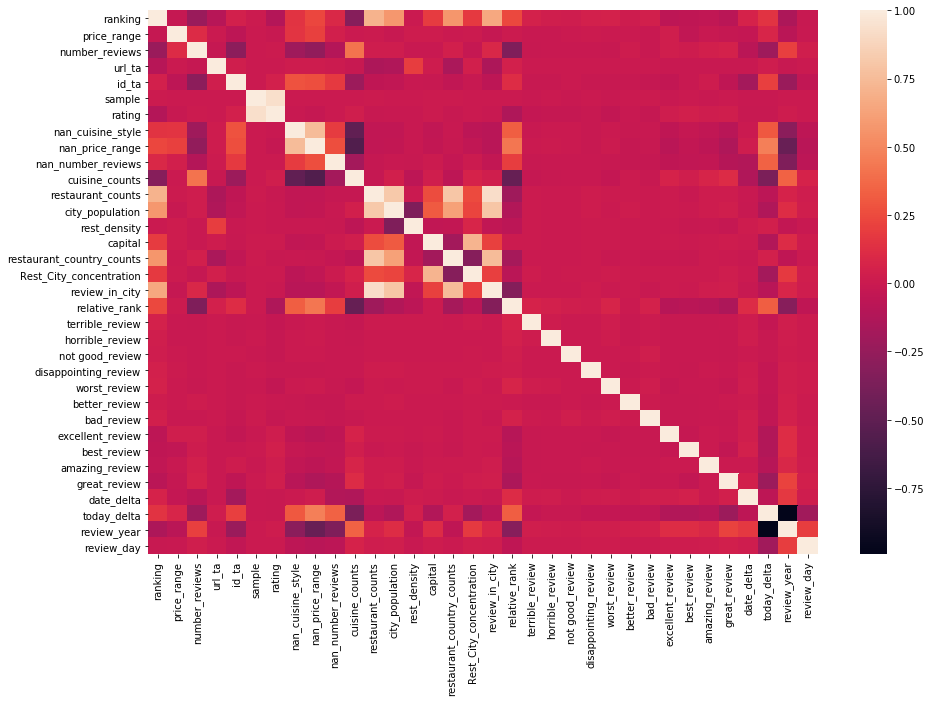

In [34]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr())

У нас явно выделяется корелляция между today_delta и review_day. Но если убрать хотя бы одну из них, то MAE увеличится, так что придется оставить.

### MAE = 0.20084

### Преобразуем текстовые и категориальные признаки в dummy-переменные

In [35]:
df = pd.get_dummies(df, columns=['city', 'country'])

In [36]:
cuisine_set = set()
for cuisine_list in df.cuisine_style:
    for cuisine in cuisine_list:
        cuisine_set.add(cuisine)

for cuisine in cuisine_set:
    df[cuisine] = 0
    df[cuisine] = df.cuisine_style.apply(lambda x: 1 if cuisine in x else 0)

df.drop(['cuisine_style'], axis=1, inplace=True)

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [37]:
# Разделим данные
train_data = df.query('sample == 1').drop(['sample'], axis=1)
test_data = df.query('sample == 0').drop(['sample'], axis=1)

In [38]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
y = train_data.rating
X = train_data.drop(['rating'], axis=1)

In [39]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [40]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_SEED)

# Создаём, обучаем и тестируем модель

In [41]:
# Импортируем необходимые библиотеки:
# инструмент для создания и обучения модели
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics  # инструменты для оценки точности модели

In [42]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [43]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.19840549999999998


Посмотрим на самые важные признаки для модели.

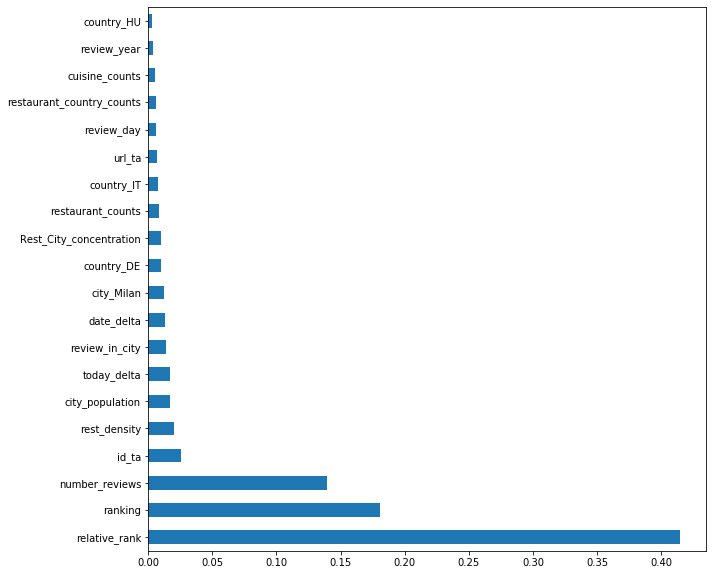

In [51]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

# Submission

In [45]:
test_data.head()

,ranking,price_range,number_reviews,url_ta,id_ta,rating,nan_cuisine_style,nan_price_range,nan_number_reviews,сuisine_counts,...,Delicatessen,Latvian,Ecuadorean,German,Vegetarian Friendly,Slovenian,Fast Food,Southwestern,Scandinavian,Cambodian
0,12963.0,2,4.0,187147,10746918,0.0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,106.0,2,97.0,189934,6674944,0.0,0,0,0,5,...,0,0,0,0,1,0,0,0,1,0
2,810.0,2,28.0,186525,13129638,0.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1669.0,3,202.0,186338,680417,0.0,0,0,0,5,...,0,0,0,0,1,0,0,0,0,0
4,37.0,3,162.0,274924,1112354,0.0,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [46]:
test_data = test_data.drop(['rating'], axis=1)

In [47]:
predict_submission = regr.predict(test_data)

In [48]:
predict_submission = np.round(predict_submission*2)/2

In [49]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [50]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.0
8,id_8,4.0
9,id_9,4.5


# Выводы:
Очистили и обогатили данными первоначальный датасет, благодаря чему существенно возросла точность предсказания рейтинга моделью.

Как еще улучшить данные, вопрос открытый. Судя по лидерборду, там есть какой-то фактор, который существенно улучшает предсказание.

Выбил 0.17040 в итоговой проверке, ник War1oR. 